In [1]:
import json
import glob
reports = []
for file in glob.glob("complaints_fixed.json"):
    for line in open(file, "r"):
        #print(line[179])
        reports.append(json.loads(line))
#reports

In [2]:
#json to dataframe
type(reports)
import pandas as pd
df = pd.DataFrame(reports)
df

,id,description,location,image_url,postedOn,category,subCategory,myCategory,page
0,1701787,Existing road inside GSS layout near Kudlu VGP...,"Vgp Layout, Kudlu, Karnataka, India",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:22,"Mobility - Roads, Footpaths and Infrastructure",Provide good driveable Roads,Provide good driveable Roads,1
1,1701702,Road was cut to lay broadband cable 6 months b...,"#127/a,1St Floor,4Th Main ,7Th Cross Dollers C...",[],2020-10-07 T00:40:23,"Mobility - Roads, Footpaths and Infrastructure",Removal Of Roadside Debris (Construction Mater...,Removal Of Roadside Debris (Construction Mater...,1
2,1700917,Street lights not working in this are 2 to 3 l...,"Corner Cafe, Someshwara Layout, Doddakannelli,...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:23,Street lighting,Maintenance/Repair Of Streetlights,Maintenance/Repair Of Streetlights,1
3,1699399,"47th Cross, 8th Block Jayanagar Road Maintenan...","674, Marenahalli Rd, 8Th Block, 1St Phase, J. ...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:31,"Mobility - Roads, Footpaths and Infrastructure",Fixing/Reparing Potholes,Fixing/Reparing Potholes,1
4,1697683,"This is place is neglected since decade, even ...","36/2, 13Th A Main Rd, Malleshwaram, Bengaluru,...",[],2020-10-07 T00:40:31,"Mobility - Roads, Footpaths and Infrastructure",Flooding/Waterlogging Of Roads And Footpaths,Flooding/Waterlogging Of Roads And Footpaths,1
...,...,...,...,...,...,...,...,...,...
44955,438570,Illegal posters are displayed at malleswaram c...,"Malleswaram Circle Bus Stop, Venkata Ranga Iye...",[],2019-10-10 T17:32:00,"Mobility - Roads, Footpaths and Infrastructure",Removal Of Illegal Posters And Hoardings,Removal Of Illegal Posters And Hoardings,3031
44956,438563,Lat few days there is no proper water supply i...,"27Th Main Rd, Btm 2Nd Stage, Kuvempu Nagar, St...",[],2019-10-10 T17:32:00,Water Supply and Services,Regular Water Supply,Regular Water Supply,3031
44957,438554,I had given a complaint regarding burning of g...,SUDHMANAGAR nala road,[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-10-10 T17:32:01,Garbage and Unsanitary Practices,Maintenance Of Dry Waste Collection Centre,Maintenance Of Dry Waste Collection Centre,3031
44958,438547,Extremely dangerous BTP barrier in the middle ...,"Anjaneya Nagar, Ittamadu, Banashankari 3Rd Sta...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-10-10 T17:32:02,"Mobility - Roads, Footpaths and Infrastructure",Provide good driveable Roads,Provide good driveable Roads,3031


In [3]:
r = pd.crosstab(index=df['myCategory'], columns=df['location'])
r
#not yet proceed further

location,"""Bhagyalakshmi Nivasa"", Chikkabidarakallu , Bengaluru","""Jaiganesh"", No 321, 1st floor, 36th A cross, 7th Main, 5th Block Jayanagar, Near Good Shepherd School","# 1 Manjushree Complex Near Laggere Bridge, Ring Road Bangalore560086, Bengaluru, Karnataka 560058, India","# 10,1st floor, Muthiyalamma Koil K St, near bus stand, Shivaji Nagar","# 11, 1 St A Main 1 St A Cross, Vivekananda Nagar, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560085, India","# 112 8th B cross EWS 1st phase, Volagalahalli, Stage II, Kengeri Satellite Town","# 118, Subbaiah Circle, Lal Bagh Main Rd, Raja Ram Mohanroy Extension, Sudhama Nagar, Bengaluru, Karnataka 560027, India","# 119, 5th Cross, BG Road, Arekere , Bengaluru","# 12 11th Cross, 4th Main Rd, Sampangi Rama Nagara","# 1208,5 th main BDA LYT, 11th Block, Anjanapura Village, 1st Phase, FEA",...,"ಹೇರೋಹಳ್ಳಿ ಸುಂಕದಕಟ್ಟೆ, null , ಸುಂಕದಕಟ್ಟೆ , ಬೆಂಗಳೂರು","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, Bellandur, Bengaluru, Karnataka 560103, India","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, ಹೊರ ವರ್ತುಲ ರಸ್ತೆ , ಚಂದ್ರ ಲೇಔಟ್ , ಬೆಂಗಳೂರು","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, ಹೊರ ವರ್ತುಲ ರಸ್ತೆ , ನಾಯಂಡಹಳ್ಳಿ , ಬೆಂಗಳೂರು","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, ಹೊರ ವರ್ತುಲ ರಸ್ತೆ , ಯಶವಂತಪುರ , ಬೆಂಗಳೂರು","ಹೊರಮಾವು, null , ಕಲ್ಯಾಣ್ ನಗರ , ಬೆಂಗಳೂರು","ಹೊಸಹಳ್ಳಿ (ಟೂವರ್ಡ್ಸ್ ನೆರಿಗೆ), null , ಬೆಂಗಳೂರು","೩೯/೧, Sannidi Rd, NR Colony, Basavanagudi","‌jinke Park, Nanjamba Agrahara, Kempegowda Nagar, Bengaluru, Karnataka, India","🎭 Abhinaya Taranga 🎭, Srinivasanagara, Hanumanthnagar, Banashankari Stage I, Banashankari, Bengaluru, Karnataka, India"
myCategory,,,,,,,,,,,,,,,,,,,,,
Air Pollution,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Autorickshaws Meter Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beautification/Maintenance Of Medians Or Circles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birth or death certificate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Build Garbage/Waste Composting Units,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Violation of Quarantine during Covid-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Water Meter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#top 10 locations
l = df.groupby('location').agg({'count'})
lc = l.iloc[:,0:1]
lc.reset_index(level=0, inplace=True)
lc.columns = ['location', 'count']
h = lc.sort_values('count', ascending=False).iloc[:10,:]
h
h['location'].tolist()

['Bengaluru, null , Bengaluru',
 'Bangalore',
 '4, Bommanahalli, Bengaluru, Karnataka 560068, India',
 '19th Main Rd, T Block, 4th T Block East, Pattabhirama Nagar, Jayanagar, Bengaluru, Karnataka 560041, India',
 'Unnamed Road, Ranka Colony, Bilekahalli, Bengaluru, Karnataka 560076, India',
 'Devarabisanahalli (Towards Devarabisanahalli), Adarsh Palm Retreat, Bellandur',
 'Kariammana Agrahara Road , Bellandur , Bengaluru',
 'Bengaluru, null , null , Bengaluru',
 '8th Main Rd, Hosapalaya, Muneshwara Nagar, Bengaluru, Karnataka 560068, India',
 'Shobha Hills View Apartment, Badamanavarthekaval, Bengaluru, Karnataka 560109, India']

In [26]:
#just checking if all location is Bangalore
l = lc.sort_values('count', ascending=True).iloc[:10,:]
l
l['location'].tolist()

['"Bhagyalakshmi Nivasa", Chikkabidarakallu , Bengaluru',
 'Ganapathipura, Konanakunte,',
 'Ganapathipura 4th MainRoad, Bangalore 560062',
 'Ganapathi nagar, Peenya 2nd stage',
 'Ganapathi Circle, 2nd Cross Road, Chandra Layout, BCC Layout, Chandra Layout,',
 'Ganakal Village, Srinivaspura, Bengaluru, Karnataka, India',
 'Game Square, Kariyammana Agrahara, Bellandur, Bengaluru, Karnataka, India',
 'Galileo Building, Whitefield , Bengaluru',
 'Galaxy convention hallKamaraj Rd Bharti Nagar Bangalore',
 'Galaxy Chambers, Banashankari , Bengaluru']

In [6]:
c = df.groupby('myCategory').agg({'count'})
c

,id,description,location,image_url,postedOn,category,subCategory,page
,count,count,count,count,count,count,count,count
myCategory,,,,,,,,
Air Pollution,277,277,277,277,277,277,277,277
Autorickshaws Meter Issues,11,11,11,11,11,11,11,11
Beautification/Maintenance Of Medians Or Circles,3,3,3,3,3,3,3,3
Birth or death certificate,1,1,1,1,1,1,1,1
Build Garbage/Waste Composting Units,18,18,18,18,18,18,18,18
...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,8,8,8,8,8,8,8,8
Violation of Quarantine during Covid-19,1,1,1,1,1,1,1,1


In [7]:
cc = c.iloc[:,0:1]
cc

,id
,count
myCategory,
Air Pollution,277
Autorickshaws Meter Issues,11
Beautification/Maintenance Of Medians Or Circles,3
Birth or death certificate,1
Build Garbage/Waste Composting Units,18
...,...
Violation of Lockdown during Covid-19,8
Violation of Quarantine during Covid-19,1


In [8]:
cc.reset_index(level=0, inplace=True)

In [9]:
cc.columns = ['myCategory', 'count']
cc

,myCategory,count
0,Air Pollution,277
1,Autorickshaws Meter Issues,11
2,Beautification/Maintenance Of Medians Or Circles,3
3,Birth or death certificate,1
4,Build Garbage/Waste Composting Units,18
...,...,...
161,Violation of Lockdown during Covid-19,8
162,Violation of Quarantine during Covid-19,1
163,Water Meter,1
164,Water Pollution,19


In [10]:
cx = cc.sort_values('count', ascending=False).iloc[:10,:]
cx['Percentage'] = cx[['count']] * 100 / 44960
cx

,myCategory,count,Percentage
37,Fixing/Reparing Potholes,10185,22.653470
90,Maintenance/Repair Of Streetlights,6744,15.000000
9,Clearance Of Garbage Dump Or Black Spot,5151,11.456851
132,Repair of Existing Footpaths,3464,7.704626
77,Maintenance Of Dry Waste Collection Centre,2638,5.867438
150,Stray Dog Sterilisation/Animal Birth Control (...,2022,4.497331
41,Garbage Dumping In Vacant Lot/Land,1512,3.362989
114,Provide good driveable Roads,1287,2.862544
27,Desilting of storm water drains,1236,2.749110
11,Collection Of Door-to-door Garbage,1136,2.526690


In [12]:
type(df['postedOn'][0])

str

In [13]:
df

,id,description,location,image_url,postedOn,category,subCategory,myCategory,page
0,1701787,Existing road inside GSS layout near Kudlu VGP...,"Vgp Layout, Kudlu, Karnataka, India",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:22,"Mobility - Roads, Footpaths and Infrastructure",Provide good driveable Roads,Provide good driveable Roads,1
1,1701702,Road was cut to lay broadband cable 6 months b...,"#127/a,1St Floor,4Th Main ,7Th Cross Dollers C...",[],2020-10-07 T00:40:23,"Mobility - Roads, Footpaths and Infrastructure",Removal Of Roadside Debris (Construction Mater...,Removal Of Roadside Debris (Construction Mater...,1
2,1700917,Street lights not working in this are 2 to 3 l...,"Corner Cafe, Someshwara Layout, Doddakannelli,...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:23,Street lighting,Maintenance/Repair Of Streetlights,Maintenance/Repair Of Streetlights,1
3,1699399,"47th Cross, 8th Block Jayanagar Road Maintenan...","674, Marenahalli Rd, 8Th Block, 1St Phase, J. ...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:31,"Mobility - Roads, Footpaths and Infrastructure",Fixing/Reparing Potholes,Fixing/Reparing Potholes,1
4,1697683,"This is place is neglected since decade, even ...","36/2, 13Th A Main Rd, Malleshwaram, Bengaluru,...",[],2020-10-07 T00:40:31,"Mobility - Roads, Footpaths and Infrastructure",Flooding/Waterlogging Of Roads And Footpaths,Flooding/Waterlogging Of Roads And Footpaths,1
...,...,...,...,...,...,...,...,...,...
44955,438570,Illegal posters are displayed at malleswaram c...,"Malleswaram Circle Bus Stop, Venkata Ranga Iye...",[],2019-10-10 T17:32:00,"Mobility - Roads, Footpaths and Infrastructure",Removal Of Illegal Posters And Hoardings,Removal Of Illegal Posters And Hoardings,3031
44956,438563,Lat few days there is no proper water supply i...,"27Th Main Rd, Btm 2Nd Stage, Kuvempu Nagar, St...",[],2019-10-10 T17:32:00,Water Supply and Services,Regular Water Supply,Regular Water Supply,3031
44957,438554,I had given a complaint regarding burning of g...,SUDHMANAGAR nala road,[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-10-10 T17:32:01,Garbage and Unsanitary Practices,Maintenance Of Dry Waste Collection Centre,Maintenance Of Dry Waste Collection Centre,3031
44958,438547,Extremely dangerous BTP barrier in the middle ...,"Anjaneya Nagar, Ittamadu, Banashankari 3Rd Sta...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-10-10 T17:32:02,"Mobility - Roads, Footpaths and Infrastructure",Provide good driveable Roads,Provide good driveable Roads,3031


In [14]:
df['month'] = df['postedOn'].str[:7]

In [29]:
cm = pd.crosstab(index=df['myCategory'], columns=df['month'])
#cm = cm.T
cm

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
myCategory,,,,,,,,,,,,,
Air Pollution,130,20,5,5,37,69,3,0,1,0,1,3,3
Autorickshaws Meter Issues,4,0,0,2,1,1,2,1,0,0,0,0,0
Beautification/Maintenance Of Medians Or Circles,1,0,0,0,1,1,0,0,0,0,0,0,0
Birth or death certificate,1,0,0,0,0,0,0,0,0,0,0,0,0
Build Garbage/Waste Composting Units,6,0,4,1,1,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,0,0,0,0,0,0,0,2,4,2,0,0,0
Violation of Quarantine during Covid-19,0,0,0,0,0,0,0,1,0,0,0,0,0
Water Meter,0,0,0,0,0,0,0,0,0,1,0,0,0


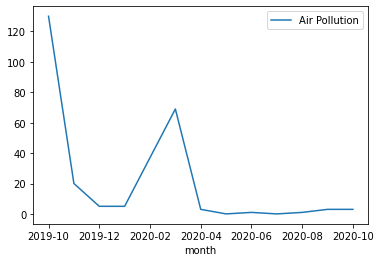

In [30]:
#cm.iloc[0].plot(legend=True)
cm.iloc[0].plot(legend=True)

#plt.show()

In [31]:
cm['Total'] = cm.sum(axis=1)
cm

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,Total
myCategory,,,,,,,,,,,,,,
Air Pollution,130,20,5,5,37,69,3,0,1,0,1,3,3,277
Autorickshaws Meter Issues,4,0,0,2,1,1,2,1,0,0,0,0,0,11
Beautification/Maintenance Of Medians Or Circles,1,0,0,0,1,1,0,0,0,0,0,0,0,3
Birth or death certificate,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Build Garbage/Waste Composting Units,6,0,4,1,1,0,1,1,1,1,0,0,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,0,0,0,0,0,0,0,2,4,2,0,0,0,8
Violation of Quarantine during Covid-19,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Water Meter,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [32]:
cms = cm.sort_values('Total', ascending=False)
cms10 = cms.iloc[0:10,:]
cms10 = cms10.drop('Total', 1)
cms10

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
myCategory,,,,,,,,,,,,,
Fixing/Reparing Potholes,5289,2069,1000,672,720,244,36,10,25,28,31,51,10
Maintenance/Repair Of Streetlights,2642,781,698,1003,1146,249,53,21,43,32,17,44,15
Clearance Of Garbage Dump Or Black Spot,2591,587,413,329,440,306,168,54,89,48,48,65,13
Repair of Existing Footpaths,1935,528,310,260,310,110,7,0,0,1,0,2,1
Maintenance Of Dry Waste Collection Centre,1264,537,312,225,239,61,0,0,0,0,0,0,0
Stray Dog Sterilisation/Animal Birth Control (ABC),1020,235,252,242,148,75,3,7,3,13,4,15,5
Garbage Dumping In Vacant Lot/Land,886,221,125,85,114,54,5,1,4,0,2,11,4
Provide good driveable Roads,732,130,102,60,108,64,22,3,8,8,9,36,5
Desilting of storm water drains,631,170,114,151,133,32,1,1,0,1,0,2,0


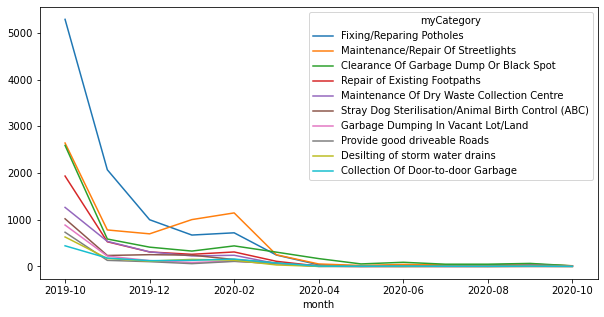

In [37]:
#month by month complaints for all period
ax = cms10.T.plot(figsize=(10,5)).get_figure()
ax.savefig('mbm_all.png')

<ipython-input-39-f25631297af0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cm_l['Total'] = cm_l.sum(axis=1)


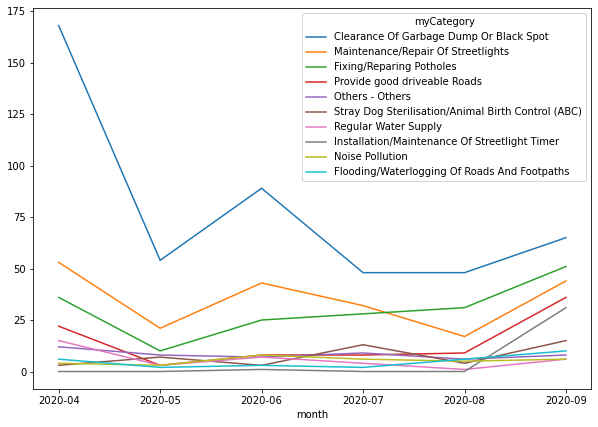

In [39]:
#month by month complaints for lockdown period
#for in the time of lockdown only (lockdown started 24 March 2020)
#data is retrieved on 8 Oct 2020, so we drop Oct couse it's an incomplete month
#for lockdown months:  cm = cm.iloc[:,6:12]
cm_l = cm.iloc[:,6:12]
cm_l['Total'] = cm_l.sum(axis=1)
cms = cm_l.sort_values('Total', ascending=False)
cms10 = cms.iloc[0:10,:]
cms10 = cms10.drop('Total', 1)
cms10
ax = cms10.T.plot(figsize=(10,7)).get_figure()
ax.savefig('mbm_ld.png')

In [20]:
type(cm.iloc[0,0])
cm.iloc[0]

month
2020-04    3
2020-05    0
2020-06    1
2020-07    0
2020-08    1
2020-09    3
Total      8
Name: Air Pollution, dtype: int64

In [21]:
df

,id,description,location,image_url,postedOn,category,subCategory,myCategory,page,month
0,1701787,Existing road inside GSS layout near Kudlu VGP...,"Vgp Layout, Kudlu, Karnataka, India",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:22,"Mobility - Roads, Footpaths and Infrastructure",Provide good driveable Roads,Provide good driveable Roads,1,2020-10
1,1701702,Road was cut to lay broadband cable 6 months b...,"#127/a,1St Floor,4Th Main ,7Th Cross Dollers C...",[],2020-10-07 T00:40:23,"Mobility - Roads, Footpaths and Infrastructure",Removal Of Roadside Debris (Construction Mater...,Removal Of Roadside Debris (Construction Mater...,1,2020-10
2,1700917,Street lights not working in this are 2 to 3 l...,"Corner Cafe, Someshwara Layout, Doddakannelli,...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:23,Street lighting,Maintenance/Repair Of Streetlights,Maintenance/Repair Of Streetlights,1,2020-10
3,1699399,"47th Cross, 8th Block Jayanagar Road Maintenan...","674, Marenahalli Rd, 8Th Block, 1St Phase, J. ...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2020-10-07 T00:40:31,"Mobility - Roads, Footpaths and Infrastructure",Fixing/Reparing Potholes,Fixing/Reparing Potholes,1,2020-10
4,1697683,"This is place is neglected since decade, even ...","36/2, 13Th A Main Rd, Malleshwaram, Bengaluru,...",[],2020-10-07 T00:40:31,"Mobility - Roads, Footpaths and Infrastructure",Flooding/Waterlogging Of Roads And Footpaths,Flooding/Waterlogging Of Roads And Footpaths,1,2020-10
...,...,...,...,...,...,...,...,...,...,...
44955,438570,Illegal posters are displayed at malleswaram c...,"Malleswaram Circle Bus Stop, Venkata Ranga Iye...",[],2019-10-10 T17:32:00,"Mobility - Roads, Footpaths and Infrastructure",Removal Of Illegal Posters And Hoardings,Removal Of Illegal Posters And Hoardings,3031,2019-10
44956,438563,Lat few days there is no proper water supply i...,"27Th Main Rd, Btm 2Nd Stage, Kuvempu Nagar, St...",[],2019-10-10 T17:32:00,Water Supply and Services,Regular Water Supply,Regular Water Supply,3031,2019-10
44957,438554,I had given a complaint regarding burning of g...,SUDHMANAGAR nala road,[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-10-10 T17:32:01,Garbage and Unsanitary Practices,Maintenance Of Dry Waste Collection Centre,Maintenance Of Dry Waste Collection Centre,3031,2019-10
44958,438547,Extremely dangerous BTP barrier in the middle ...,"Anjaneya Nagar, Ittamadu, Banashankari 3Rd Sta...",[https://jccd-ichangemycity-complaints.s3.ap-s...,2019-10-10 T17:32:02,"Mobility - Roads, Footpaths and Infrastructure",Provide good driveable Roads,Provide good driveable Roads,3031,2019-10


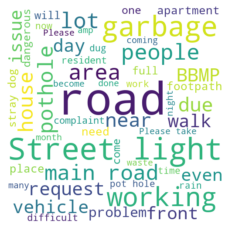

In [27]:
#word clouds for description
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(max_words=50, background_color="white", width = 500, height = 500).generate(' '.join(df['description']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("wc_d.png")

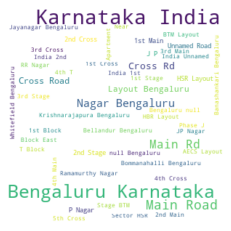

In [28]:
#word clouds for locations
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(max_words=50, background_color="white", width = 300, height = 300).generate(' '.join(df['location']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("wc_l.png")